In [3]:
pip install pandas

In [9]:
import pandas as pd

df = pd.read_excel("C:\\Users\\win10\\Desktop\\New folder\\gba_app reviews.xlsx")

print(df.head())

                                                text  thumbsUp
0              Excellent Data management 👌👌👌👌👌👌👌👌👌👌👌         0
1                                      love this app         0
2                                              great         0
3                                        good so far         0
4  you write with the pen of heart...words shall ...         0


In [10]:
pip install nltk

In [18]:
import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [19]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Load your excel file
# The 'r' before the string is a good practice for file paths in Python
df = pd.read_excel(r"C:\\Users\\win10\\Desktop\\New folder\\gba_app reviews.xlsx")

# IMPORTANT: Make sure your text column is actually named 'text'.
# If it has a different name (e.g., 'Reviews'), change 'text' in the lines below.
# You can check the column names by running: print(df.columns)

# 1. Remove missing rows from the 'text' column
df.dropna(subset=['text'], inplace=True)

# 2. Tokenize the 'text' column
df['tokenized_text'] = df['text'].apply(word_tokenize)

# 3. Make every text in the 'text' column lower case
df['lowercase_text'] = df['text'].str.lower()

# 4. Remove special characters
df['no_special_chars_text'] = df['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# 5. Remove stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_removed_text'] = df['no_special_chars_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

print(df.head())

                                                text  thumbsUp  \
0              Excellent Data management 👌👌👌👌👌👌👌👌👌👌👌         0   
1                                      love this app         0   
2                                              great         0   
3                                        good so far         0   
4  you write with the pen of heart...words shall ...         0   

                                      tokenized_text  \
0         [Excellent, Data, management, 👌👌👌👌👌👌👌👌👌👌👌]   
1                                  [love, this, app]   
2                                            [great]   
3                                    [good, so, far]   
4  [you, write, with, the, pen, of, heart, ..., w...   

                                      lowercase_text  \
0              excellent data management 👌👌👌👌👌👌👌👌👌👌👌   
1                                      love this app   
2                                              great   
3                                        g

In [20]:
# Define the name for your new Excel file
output_filename = 'processed_reviews.xlsx'

# Save the DataFrame to an Excel file
# The index=False argument prevents pandas from writing the DataFrame index as a column in the Excel file.
df.to_excel(output_filename, index=False)

print(f"File has been saved successfully as '{output_filename}'")

File has been saved successfully as 'processed_reviews.xlsx'


In [21]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.8 MB/s eta 0:00:00


In [22]:
from textblob import TextBlob

# 1. Load your preprocessed Excel file
input_filename = 'processed_reviews.xlsx'
df = pd.read_excel(input_filename)

# Ensure the target column is treated as a string to avoid errors
df['stopwords_removed_text'] = df['stopwords_removed_text'].astype(str)

# 2. Define functions to get polarity and subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# 3. Apply the functions to the 'stopwords_removed_text' column
df['polarity'] = df['stopwords_removed_text'].apply(get_polarity)
df['subjectivity'] = df['stopwords_removed_text'].apply(get_subjectivity)

# 4. Create a sentiment category column
def get_sentiment_category(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['polarity'].apply(get_sentiment_category)

# 5. Display the results
# We'll show the text column and the new sentiment columns
print(df[['stopwords_removed_text', 'polarity', 'subjectivity', 'sentiment_category']].head())

# Optional: Save the new DataFrame with sentiment scores to a new Excel file
df.to_excel('reviews_with_sentiment.xlsx', index=False)
print("\nSentiment analysis complete. Results saved to 'reviews_with_sentiment.xlsx'")

                              stopwords_removed_text  polarity  subjectivity  \
0                          excellent data management       1.0          1.00   
1                                           love app       0.5          0.60   
2                                              great       0.8          0.75   
3                                           good far       0.4          0.80   
4  write pen heartwords shall never fell shortfor...       0.0          0.00   

  sentiment_category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4            Neutral  

Sentiment analysis complete. Results saved to 'reviews_with_sentiment.xlsx'


In [23]:
pip install matplotlib

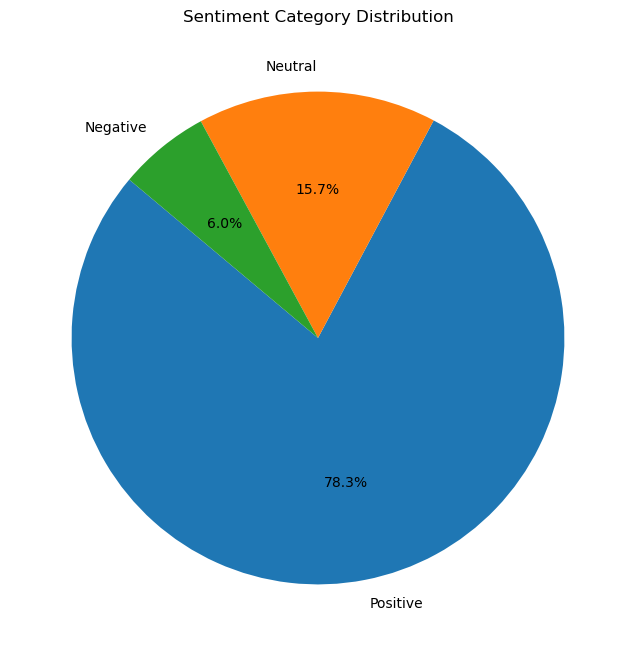

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from your Excel file
df = pd.read_excel('reviews_with_sentiment.xlsx')

# Count the occurrences of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Category Distribution')
plt.ylabel('')  # This hides the 'sentiment_category' label on the side

# Display the chart
plt.show()

In [1]:
pip install scikit-learn

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Load your preprocessed data
df = pd.read_excel('reviews_with_sentiment.xlsx')

# Handle any potential empty rows after stopword removal
df['stopwords_removed_text'].fillna('', inplace=True)
documents = df['stopwords_removed_text']

# 2. Vectorize the text data using TF-IDF
# max_df=0.95 ignores terms that appear in more than 95% of the documents
# min_df=2 ignores terms that appear in less than 2 documents
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# 3. Apply NMF to find 5 topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# 4. Display the topics with their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(" ".join(top_words))
        print("-" * 50)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

print("Discovered Topics and their Top Words:\n")
display_topics(nmf_model, feature_names, num_top_words)

C:\Users\win10\AppData\Local\Temp\ipykernel_2560\2275373900.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stopwords_removed_text'].fillna('', inplace=True)


Discovered Topics and their Top Words:

Topic #1:
good platform really project use writers far thanks work apps
--------------------------------------------------
Topic #2:
great medium articles work writers readers plateform thanks stories site
--------------------------------------------------
Topic #3:
nice interface project wow writing article place journey smart learn
--------------------------------------------------
Topic #4:
app amazing like really helpful best reading writers free want
--------------------------------------------------
Topic #5:
love medium platform read amazing wow way try writers reliable
--------------------------------------------------


C:\Users\win10\AppData\Local\Temp\ipykernel_2560\1883849576.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stopwords_removed_text'].fillna('', inplace=True)


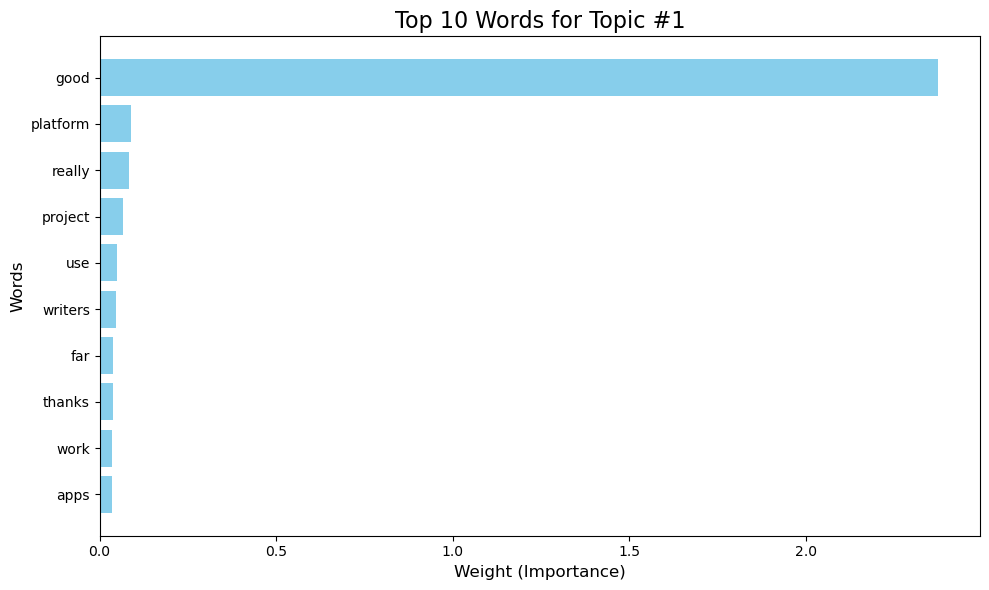

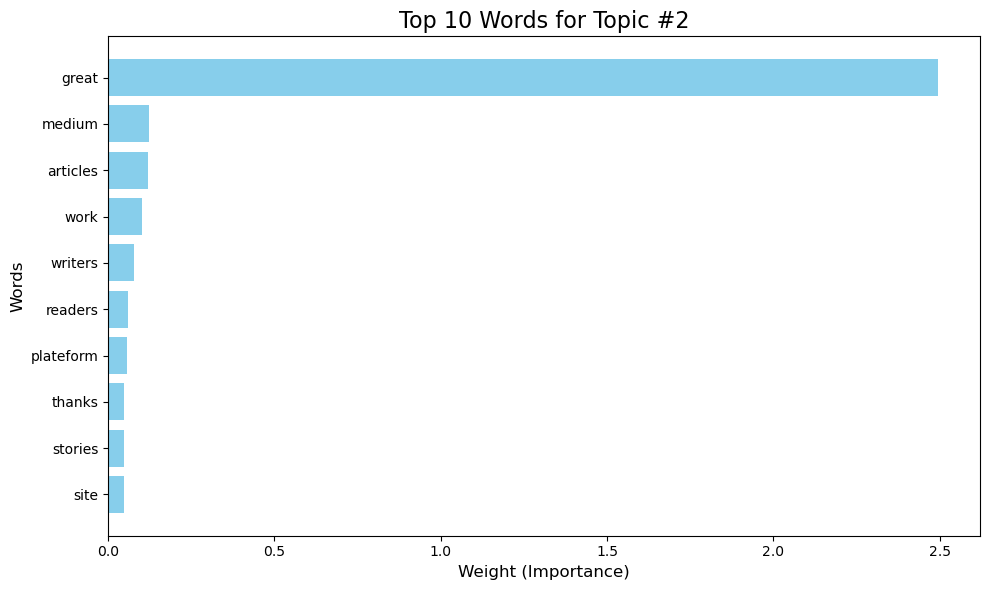

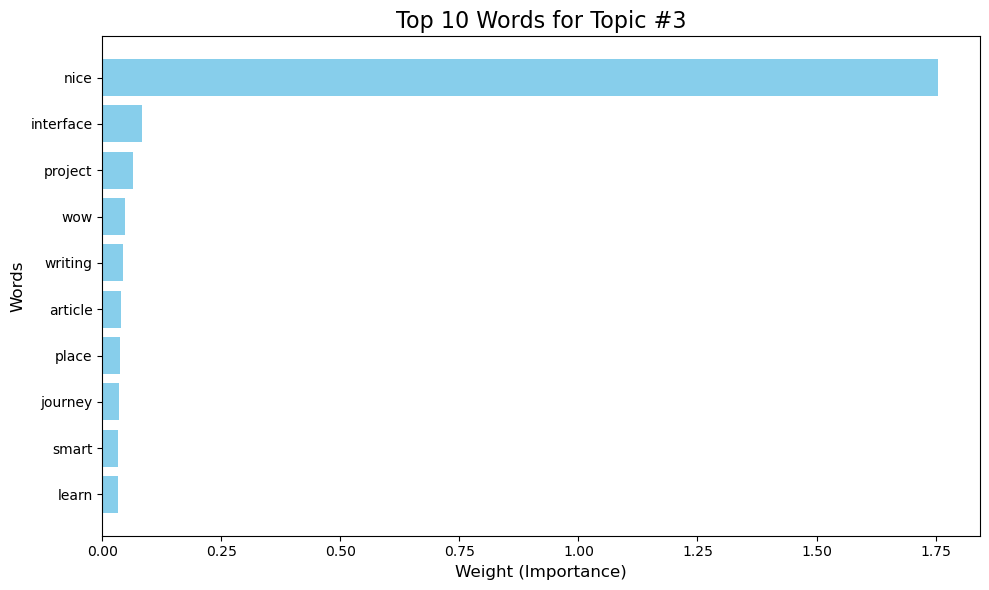

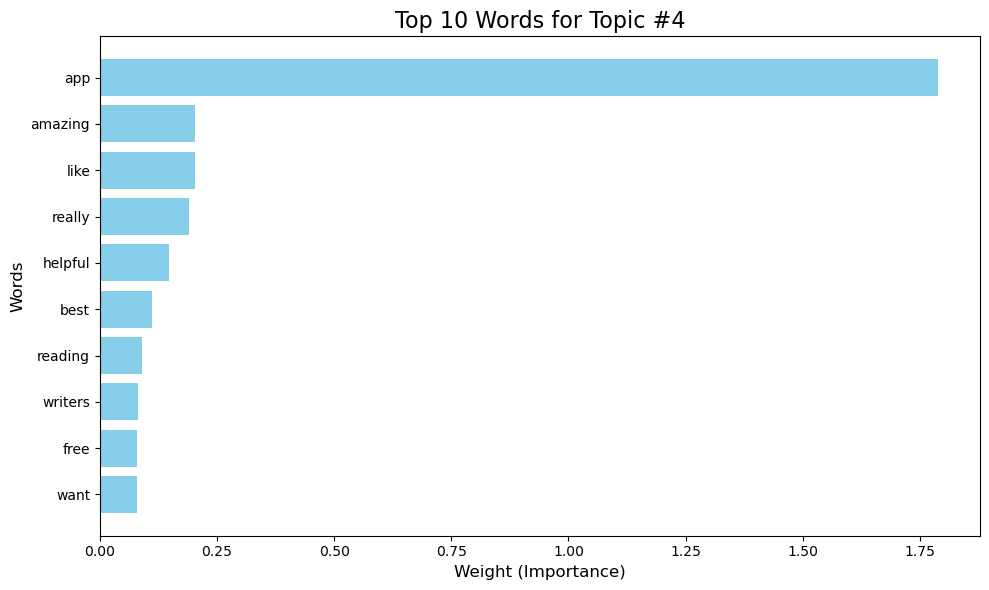

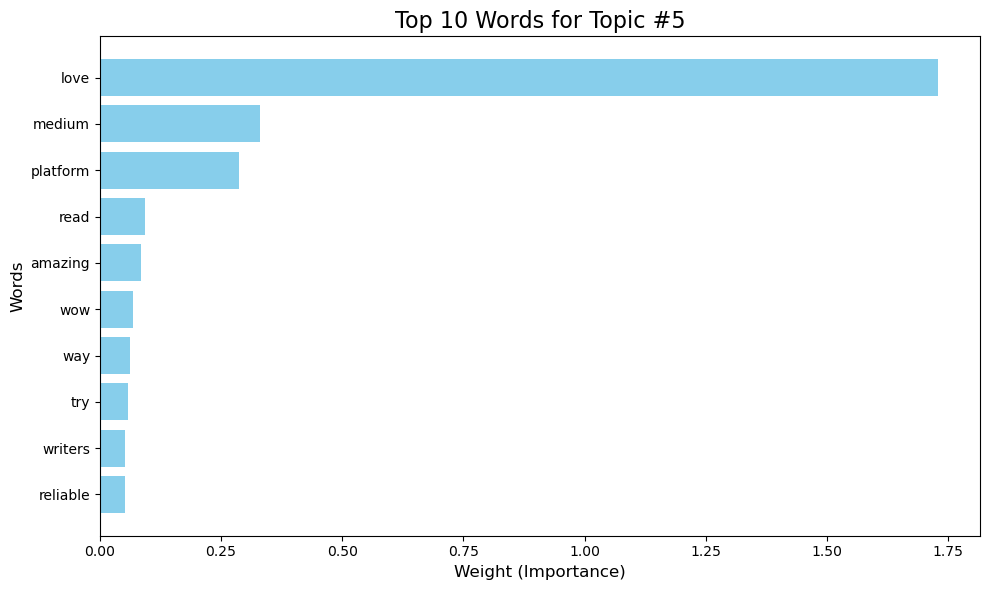

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# 1. Load your preprocessed data
df = pd.read_excel('reviews_with_sentiment.xlsx')

# Handle any potential empty rows after stopword removal
df['stopwords_removed_text'].fillna('', inplace=True)
documents = df['stopwords_removed_text']

# 2. Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# 3. Apply NMF to find 5 topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# 4. Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# 5. Loop through each topic to create and display a bar chart
for topic_idx, topic in enumerate(nmf_model.components_):
    # Get the top words and their weights for the current topic
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]

    # Create the horizontal bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_weights, color='skyblue')
    
    # Invert y-axis to have the most important word on top
    plt.gca().invert_yaxis()
    
    # Add titles and labels
    plt.title(f'Top {num_top_words} Words for Topic #{topic_idx + 1}', fontsize=16)
    plt.xlabel('Weight (Importance)', fontsize=12)
    plt.ylabel('Words', fontsize=12)
    
    # Ensure layout is tight and display the plot
    plt.tight_layout()
    plt.show()

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


C:\Users\win10\AppData\Local\Temp\ipykernel_2560\1463138410.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stopwords_removed_text'].fillna('', inplace=True)


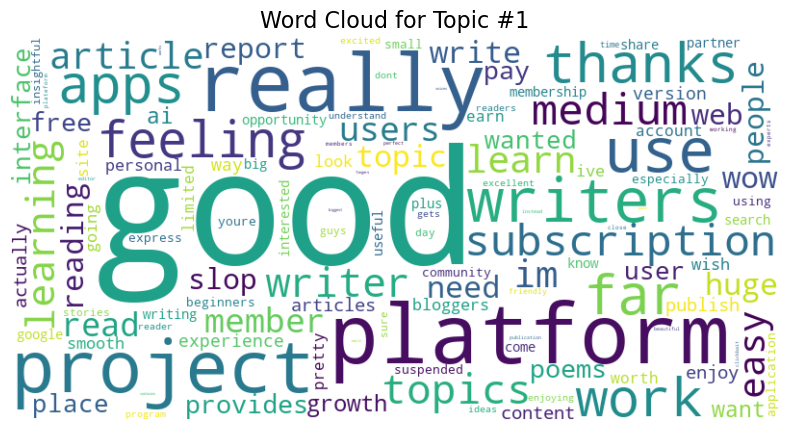

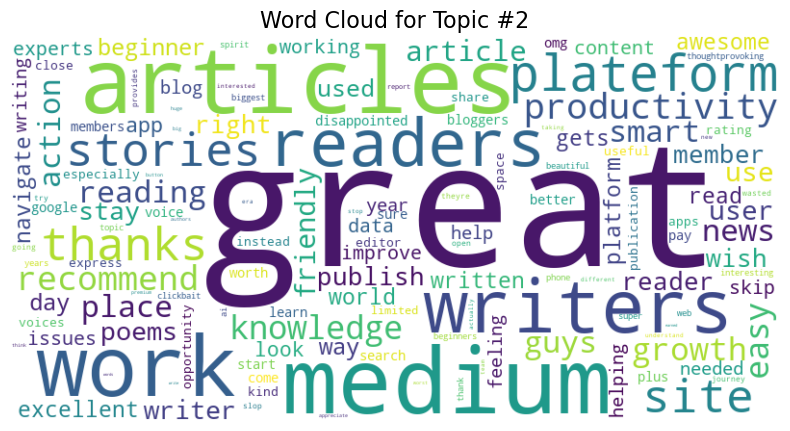

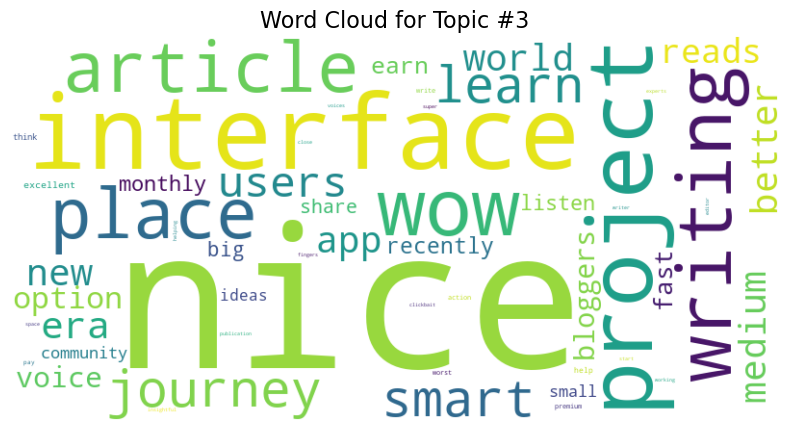

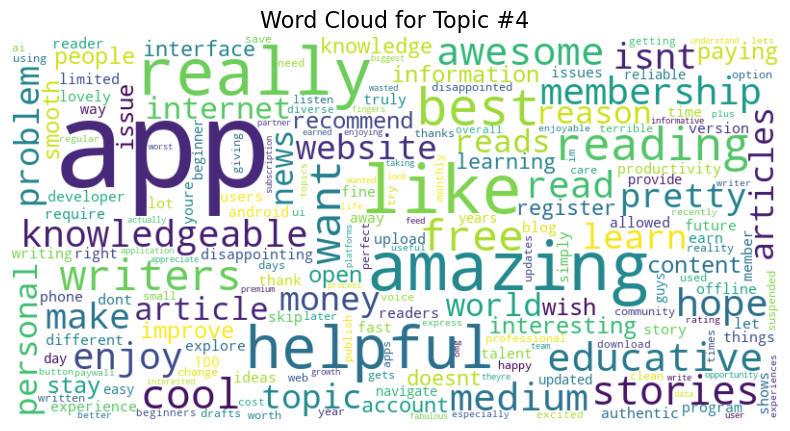

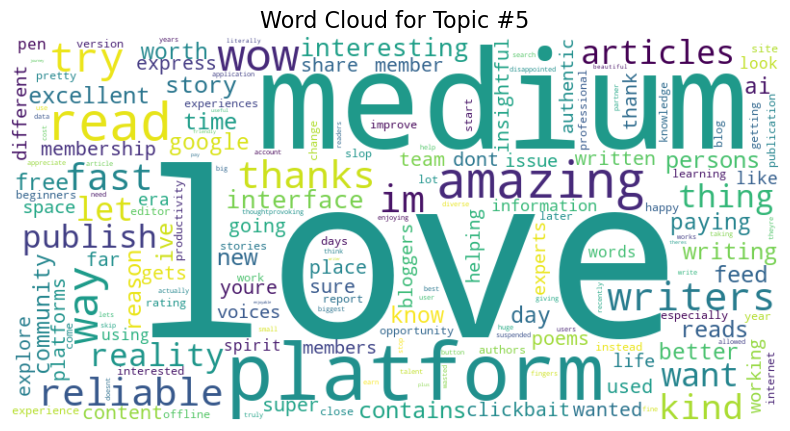

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from wordcloud import WordCloud

# 1. Load your preprocessed data
df = pd.read_excel('reviews_with_sentiment.xlsx')

# Handle any potential empty rows after stopword removal
df['stopwords_removed_text'].fillna('', inplace=True)
documents = df['stopwords_removed_text']

# 2. Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# 3. Apply NMF to find 5 topics
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# 4. Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# 5. Loop through each topic to generate and display a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}
    
    # Create the WordCloud object
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white'
    ).generate_from_frequencies(topic_words)
    
    # Display the generated image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{topic_idx + 1}', fontsize=16)
    plt.axis('off') # Hide the axes
    plt.show()